In [23]:
import laspy
import sys
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import rasterio
from rasterio.transform import from_origin
import os
import time
import math
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.morphology import grey_dilation, grey_opening
from scipy.ndimage import generate_binary_structure
from tqdm import tqdm_notebook

import fiona
import rasterio
import rasterio.mask



In [29]:
sentinel_folder = "/media/roberto/Data1/forestry/Sentinel1/1SDV/"
lidar_folder = "/media/roberto/Data1/forestry/data/lidar/"

sar_filename = "20180917_UTM_THD29_rect.tif"
# sar_filename = "VH+VV.tif"
vv_filename = "VH_THD29.tif"
vh_filename = "VV.tif"
#chm_filename = "chm_THD29_linear_33.tif"
chm_filename = "chm_THD29_rect.tif"

(0.33, 0.33)

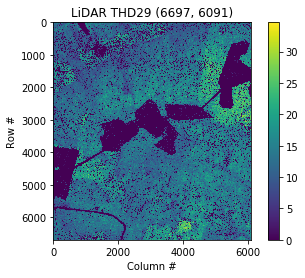

In [30]:
file_chm = rasterio.open(sentinel_folder+chm_filename)
chm_band = file_chm.read(1)

plt.imshow(chm_band)
plt.colorbar()
plt.title('LiDAR THD29 {}'.format(chm_band.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

file_chm.width
file_chm.height
file_chm.res

(10.0, 10.0)

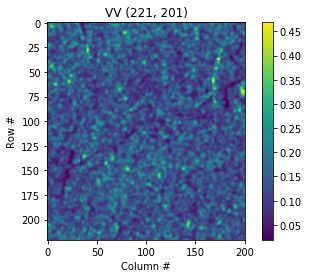

In [42]:
file_sar = rasterio.open(sentinel_folder+sar_filename)
vv_band_no_filtered = file_sar.read(2)
vv_band = gaussian_filter(vv_band_no_filtered, sigma=1)

plt.imshow(vv_band)
plt.colorbar()
plt.title('VV {}'.format(vv_band.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
file_sar.res

In [43]:
from shapely import geometry
from shapely.geometry import Polygon

vv_list = []
chm_list = []
for i in tqdm_notebook(range(0, file_sar.height)):
    for j in range(0, file_sar.width):
        x_coor, y_coor = file_sar.xy(i,j) # get center of SAR pixel
        polygon = Polygon([(x_coor-5, y_coor-5), (x_coor+5, y_coor-5), (x_coor+5, y_coor+5), (x_coor-5, y_coor+5)])
        out_image, out_transform = rasterio.mask.mask(file_chm, [polygon], nodata=np.nan, crop=True)  
#         plt.imshow(out_image[0])
        vv_list.append(vv_band[i,j])
        chm_list.append(np.nanmean(out_image))

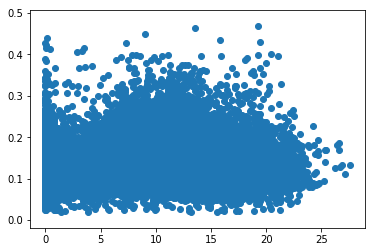

In [44]:
plt.scatter(chm_list, vv_list)
plt.show()